In [2]:
import pandas as pd
import numpy as np

attacks_df= pd.read_csv("attacks-on-health-care-systems-data.csv")
attacks_df.head(5)

,year,Attack Date,weekday,Attack ID,Attack Time,Country / Territory,Certainty Level,Attack Type,Total Injured,Total Death,...,HC Patients,HC Other,Type of Facility,Facility Other,HW Abduction,HW Arrest,HW Detention,Patient Abduction,Patient Arrest,Patient Detention
0,2024,2/8/24 12:00 AM,Thu,oPt010355,Time Unknown,occupied Palestinian territory,Confirmed,"Violence with individual weapons (knives, bric...",1.0,0.0,...,YES,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,2024,2/7/24 12:00 AM,Wed,oPt010356,Time Unknown,occupied Palestinian territory,Confirmed,"Violence with individual weapons (knives, bric...",2.0,1.0,...,YES,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,2024,2/7/24 12:00 AM,Wed,oPt010354,Time Unknown,occupied Palestinian territory,Confirmed,Obstruction to health care delivery (e.g. phys...,0.0,1.0,...,YES,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,2024,2/7/24 12:00 AM,Wed,oPt010352,Time Unknown,occupied Palestinian territory,Confirmed,"Violence with individual weapons (knives, bric...",2.0,0.0,...,YES,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,2/7/24 12:00 AM,Wed,oPt010351,Time Unknown,occupied Palestinian territory,Confirmed,Violence with heavy weapons (requires more tha...,5.0,1.0,...,YES,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
attacks_df.describe()

,year,Total Injured,Total Death,HW Abduction,HW Arrest,HW Detention,Patient Abduction,Patient Arrest,Patient Detention
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,2021.010515,0.646169,0.303011,0.066114,0.091445,0.060220,0.013860,0.005257,0.009559
std,1.811430,5.223847,6.261683,0.552467,2.592505,0.961101,0.301841,0.093466,0.287133
min,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2022.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2022.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2024.000000,342.000000,471.000000,21.000000,200.000000,70.000000,15.000000,4.000000,21.000000


In [4]:
# Find nan/null values in the columns
attacks_df.isnull().sum()

year                       0
Attack Date                0
weekday                    0
Attack ID                  0
Attack Time                0
Country / Territory        0
Certainty Level            0
Attack Type                0
Total Injured              0
Total Death                0
HC Facilities              0
HC Transport               0
HC Personnel               0
HC Supplies Assets         0
HC Warehouse Storage       0
HC Patients                0
HC Other                6140
Type of Facility        2927
Facility Other          5516
HW Abduction               0
HW Arrest                  0
HW Detention               0
Patient Abduction          0
Patient Arrest             0
Patient Detention          0
dtype: int64

In [5]:
# Drop the columns where the null vales more than 2000
attacks_df.dropna(axis=1, thresh=2000, inplace=True)

### Find the the number of unique attack types in the dataset

According to the report they are supoose to be 15 types;.

| Attack Type                     | Description                                                                                                                                                                |
|---------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Psychological violence          | Includes threats of violence, intimidation, emotional abuse (insults, belittling, humiliation), or explicit declarations of intent to inflict harm (physical or psychological). |
| Removal of health care assets   | Involves looting, robbery, or theft of health care assets. Looting refers to stealing goods during war or riots. Theft is unauthorized taking, while robbery involves force or threat. |
| Removal of health care personnel or patients | Abduction, arrest, or detention of health care personnel or patients.                                                                                                     |
| Setting fire                    | Malicious burning, arson.                                                                                                                                               |
| Sexual assault                  | Non-consensual sexual acts committed against someone.                                                                                                                    |
| Violence with heavy weapons     | Violence involving weapons requiring more than one person, like firearms, tanks, missiles, bombs, or mortars.                                                               |
| Violence with individual weapons| Violence using weapons like knives, bricks, clubs, guns, grenades, or improvised explosive devices (IEDs).                                                                  |
| Abduction                       | The unlawful removal, seizure, capture, apprehension, taking, or enforced disappearance of a person either temporarily or permanently.                                      |
| Armed or violent search         | Examination of a person’s body or property, or of a health care facility or transport through the use of physical violence, weapons, or other means of coercion.           |
| Arrest                          | A seizure or forcible restraint; an exercise of the power to deprive a person of his or her liberty.                                                                      |
| Assault                         | Violence inflicted from one person to another person that does not involve individual weapons or heavy weapons.                                                           |
| Chemical agent                  | A hazardous chemical has been intentionally released, and the release has the potential for harming people’s health.                                                       |
| Detention                       | The condition of being held in confinement and deprived of personal liberty.                                                                                              |
| Militarization of civilian health care facility | Diversion of or interference with the primary use of civilian (i.e., non-military) health care facilities or transport by state military or paramilitary forces or non-state armed groups. |
| Obstruction to health care delivery (e.g. physical, administrative, or legal) | Any act resulting in blocking or preventing access to health care (e.g., an ambulance is prevented from accessing patients, or patients are inhibited from accessing or receiving needed health services). |



In [6]:
# Find the number of the unique attacks
attacks_df['Attack Type'].nunique()

328

### Now, we need to find how many types of the attacks occurred in each entry, by creating a new Dataframe

In [14]:
copy_columns= ['Attack Date','Country / Territory','Certainty Level', 'Attack Type', 'Total Injured', 'Total Death']
attacks_types_df = attacks_df[copy_columns].copy()

In [15]:

def count_attacks_in_sentences(sentences, attack_types):
    """
    Count the number of attacks of each type within each sentence in the given list of sentences.
    
    Args:
    - sentences (list): List of sentences to search within.
    - attack_types (list): List of attack types.
    
    Returns:
    - A DataFrame containing the attack summaries for each sentence.
    """
    attack_summaries = []  # Initialize a list to store attack summaries for each sentence
    
    # Iterate over each sentence in the list of sentences
    for sentence in sentences:
        # Initialize a dictionary to store the count of each attack type for the current sentence
        attack_counts = {attack_type: 0 for attack_type in attack_types}
        attack_counts['total_attacks'] = 0  # Add a key-value pair for total attacks
        
        # Convert the sentence to lowercase for case-insensitive matching
        sentence_lower = sentence.lower()
        
        # Check if each attack type exists within the sentence
        for attack_type in attack_types:
            if attack_type.lower() in sentence_lower:
                attack_counts[attack_type] += 1
                attack_counts['total_attacks'] += 1  # Increment total attacks
        
        # Append the attack summary for the current sentence to the list of attack summaries
        attack_summaries.append(attack_counts)
    
    # Convert the list of dictionaries to a DataFrame
    df_attack_summaries = pd.DataFrame(attack_summaries)
    
    return df_attack_summaries

# List of attack types
attack_types = [
    "Psychological violence",
    "Removal of health care assets",
    "Removal of health care personnel or patients",
    "Setting fire",
    "Sexual assault",
    "Violence with heavy weapons",
    "Violence with individual weapons",
    "Abduction",
    "Armed or violent search",
    "Arrest",
    "Assault",
    "Chemical agent",
    "Detention",
    "Militarization of civilian health care facility",
    "Obstruction to health care delivery"
]


# Generate attack summaries for each sentence
df_attack_summaries = count_attacks_in_sentences(attacks_df['Attack Type'], attack_types)

# Concatenate the attack summary DataFrame with the copied DataFrame
attacks_types_df = pd.concat([attacks_types_df, df_attack_summaries], axis=1)

attacks_types_df.columns

Index(['Attack Date', 'Country / Territory', 'Certainty Level', 'Attack Type',
       'Total Injured', 'Total Death', 'Psychological violence',
       'Removal of health care assets',
       'Removal of health care personnel or patients', 'Setting fire',
       'Sexual assault', 'Violence with heavy weapons',
       'Violence with individual weapons', 'Abduction',
       'Armed or violent search', 'Arrest', 'Assault', 'Chemical agent',
       'Detention', 'Militarization of civilian health care facility',
       'Obstruction to health care delivery', 'total_attacks'],
      dtype='object')

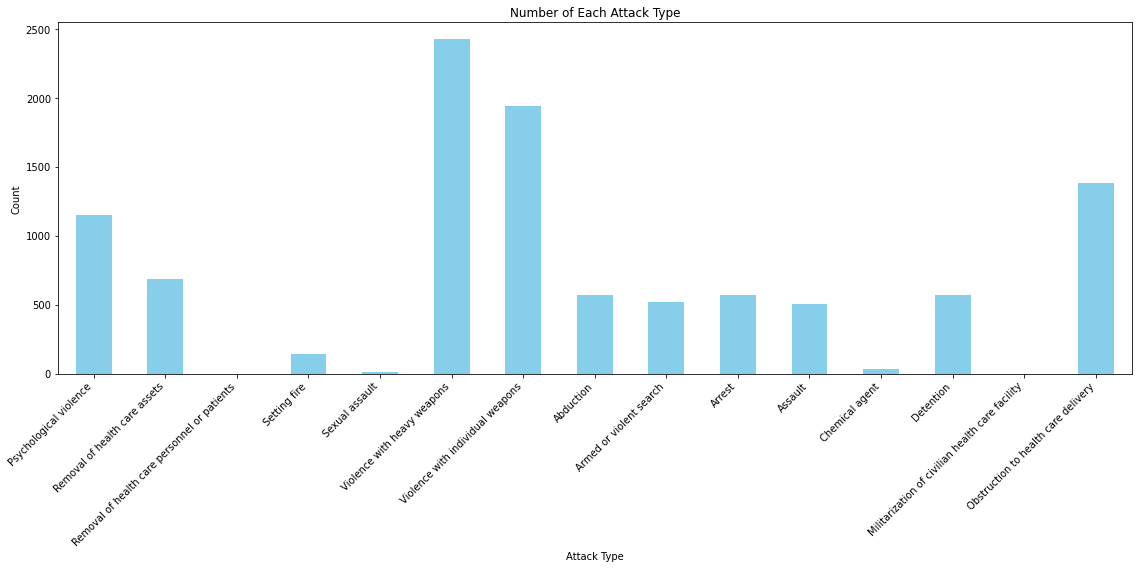

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
attacks_types_df[attack_types].sum().plot(kind='bar', color='skyblue')
plt.title('Number of Each Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

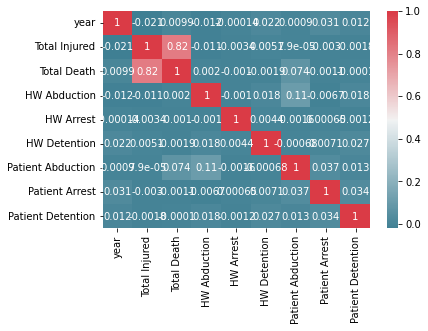

In [17]:
import seaborn as sns

corr = attacks_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()